### 멀티프로세싱과 멀티스레딩

#### 멀티프로세싱과 멀티스레딩의 개념

- 컴퓨터상에서 **프로그램**을 실행하면 먼저 **프로세스(process)**가 실행됨.
- 프로세스 내에서는 **스레드(thread)**가 실행됨.
- 프로그래머가 직접 정의하지 않는 이상, 파이썬에서는 하나의 프로세스가 하나의 스레드를 생성
- 하지만 하나의 프로그램이 꼭 하나의 프로세스만을 실행하거나, 하나의 프로세스가 꼭 하나의 스레드를 실행해야 하는 것은 아님.
- 하나의 프로그램에서 여러 개의 프로세스를 생성하는 것을 **멀티프로세싱(Multi-processing)**이라 하며,
- 하나의 프로세스에서 여러 개의 스레드를 생성하는 것을 **멀티스레딩(Multi-threading)**이라 함.


- **Reference: **

- 파이썬과 케라스로 배우는 강화학습(p.302~),

- 파이썬을 활용한 금융분석(p.265~),
- https://docs.python.org/3/library/multiprocessing.html,
- https://docs.python.org/3/library/threading.html

#### (참고) 코어와 스레드

코어는 실제로 물리적으로 구별이 되는 코어칩을 말하는 겁니다.

즉, 예를 들어서 듀얼코어(쿼드코어)라고 한다면 CPU안에 코어칩이 두 개(네 개가) 든 겁니다.
그런데 스레드란 실제로 물리적인 칩을 말하는 게 아니고
논리적으로 나뉜 가상의 칩을 말하는 겁니다.

예를 들어서 Core i-3 같은 경우에는 듀얼코어 4스레드라고 하는데요.
이게 뜻하는 바는 물리적인 코어칩은 두 개인데
각각의 코어를 논리적으로 두 개인 거처럼 만들었다는 겁니다.
그래서 2 X 2 = 4스레드가 되는 거죠.

#### 멀티프로세싱

파이썬의 표준 멀티프로세싱 라이브러리는 **"multiprocessing"**임

In [1]:
import multiprocessing as mp

In [18]:
# 내 컴퓨터의 코어는 2개(듀얼코어)? 4개(쿼드코어)? <-- 맥북 사양: 3.3 GHz Intel Core i7

mp.cpu_count()

4

In [2]:
# 파이썬을 활용한 금융분석(p.265~) 예제

import math
import numpy as np

# 주가 시뮬레이션 함수(기하브라운 운동)
def simulate_geometric_brownian_motion(p):
    M, I = p
    S0 = 100; r=0.05; sigma=0.2; T=1.0
    dt = T/M
    paths = np.zeros((M+1, I))
    paths[0] = S0
    for t in range(1, M+1):
        paths[t] = paths[t-1] * np.exp((r-0.5 * sigma**2)*dt + sigma*math.sqrt(dt)* np.random.standard_normal(I))
    return paths

In [3]:
paths = simulate_geometric_brownian_motion((5,2))
paths

array([[ 100.        ,  100.        ],
       [ 109.64211425,  112.42534912],
       [ 123.66585604,   98.23327867],
       [ 116.64695054,   94.6239706 ],
       [ 114.64394491,  103.78288847],
       [ 124.36931889,  112.18418249]])

In [4]:
I = 10000
M = 100
t = 100

from time import time
times = []

# 프로세스 4개 돌려보기
for w in range(1,5): 
    t0 = time()
    pool = mp.Pool(processes=w)
    result = pool.map(simulate_geometric_brownian_motion, t*[(M,I), ])
    times.append(time()-t0)

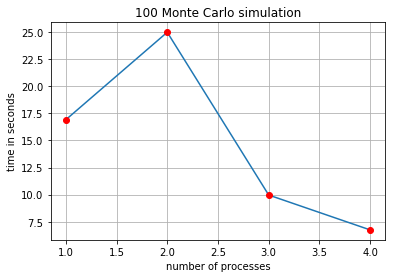

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1,5), times)
plt.plot(range(1,5), times, 'ro')
plt.grid(True)
plt.xlabel('number of processes')
plt.ylabel('time in seconds')
plt.title('%d Monte Carlo simulation'%t)

In [6]:
I = 10000
M = 100
t = 100

from time import time
times = []

# 프로세스 8개 돌려보기
for w in range(1,9): 
    t0 = time()
    pool = mp.Pool(processes=w)
    result = pool.map(simulate_geometric_brownian_motion, t*[(M,I), ])
    times.append(time()-t0)

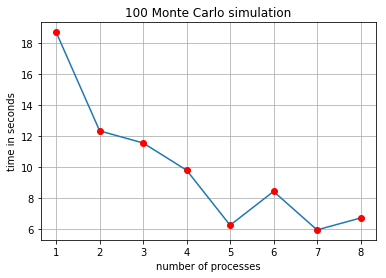

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1,9), times)
plt.plot(range(1,9), times, 'ro')
plt.grid(True)
plt.xlabel('number of processes')
plt.ylabel('time in seconds')
plt.title('%d Monte Carlo simulation'%t)

#### 멀티스레딩

멀티스레딩의 표준 라이브러리는 **"threading"**임

In [8]:
import threading

In [13]:
# 파이썬과 케라스로 배우는 강화학습(p.302~) 예제
# A3C에서의 "멀티스레딩" 활용 예

# 우선 threading.Thread를 상속받아서 에이전트(Agent) 클래스를 생성

class Agent(threading.Thread):
    
    # 상속받은 threading.Thread를 초기화
    def __init__(self):
        threading.Thread.__init__(self)
        pass
    
    # run이라는 함수를 만들면 run함수가 여러 개의 스레드에서 실행
    def run(self):
        for i in range(100):
            print(i)
            print("-")

In [14]:
# 8개의 클래스를 생성
agents = [Agent() for i in range(8)]  

# start()를 실행하면 각 클래스 내의 run함수가 각각 8개의 스레드로 나눠서 실행됨.
for agent in agents:
    agent.start()

00
0000-




00
-----

1




--
11111

-




11
-----

2




--
22222

-




22
-----

3




--
33333

-




33
-----

4




--
44444

-



44
--
--

5

-

--
55
55

-

5

55
--
--

6

-

--
66
66

-

6

66
--
--

7

-

--
77
77

-

7

77
--
--

8

-

--
88
88

-

8

88
--
--

9

-

--
99
99

-

9

99
--
--

10

-

--
1010
1010

-

10

1010
--
--

11

-

--
1111
1111

-

11

1111
--
--

12

-

--
1212
1212

-

12

1212
--
--

13

-

--
1313
1313

-

13

1313
--
--

14

-

--
1414
1414

-

14

1414
--
--

15

-

--
1515
1515

-

15

1515
--
--

16

-

--
1616
1616

-

16

1616
--
--

17

-

--
1717
1717

-

17

1717
--
--

18

-

--
1818
1818

-

18

1818
--
--

19

-

--
1919
1919

-

19

1919
--
--

20

-

--
2020
2020

-

20

2020
--
--

21

-

-
2121
2121
--

21

21

--
--
2122

-

-

2222
2222
--

22

22

--
--
2223

-

-

2323
2323
--

23

23

--
--
2324

-

-

2424
2424
--

24

24

--
--
2425

-

-

2525
2525
--

25

25

--
--
2526

-

-

2626
2626
--

26

26

--
--
2627

-

-

2

--> A3C에서도 여러 액터러너가 각각의 환경에서 탐험하며 학습에 필요한 샘플을 모으는 작업을 여러 스레드에서 수행